In [ ]:
from keras.applications import vgg16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from keras.layers import ZeroPadding2D, BatchNormalization
from keras.applications.vgg16 import VGG16

# MobileNet was designed to work on 224 x 224 pixel input images sizes
img_rows, img_cols = 224, 224

# Re-loads the MobileNet model without the top or FC layers
vgg = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(img_rows, img_cols, 3))

# Here we freeze the last 4 layers
for layer in vgg.layers:
    layer.trainable = False

# Let's print our layers
for (i, layer) in enumerate(vgg.layers):
    print(str(i) + " " + layer.__class__.__name__, layer.trainable)

def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Set our class number to 2 (assuming binary classification)
num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs=vgg.input, outputs=FC_Head)

print(model.summary())

58889256/58889256 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/drive/My Drive/photos/photos/train'
validation_data_dir = '/content/drive/My Drive/photos/photos/validate'

# Let's use some data augmentaiton
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# set our batch size (typically on most mid tier systems we'll use 16-32)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')




Found 503 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint("face recognisation.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# We use a very small learning rate
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

# Enter the number of training and validation samples here
nb_train_samples = 108
nb_validation_samples = 52

# We only train 5 EPOCHS
epochs = 5
batch_size = 16

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)


<ipython-input-5-2587e57752a8>:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
6/6 [==============================] - ETA: 0s - loss: 1.5224 - accuracy: 0.5052
Epoch 1: val_loss improved from inf to 0.67066, saving model to face recognisation.h5
6/6 [==============================] - 56s 8s/step - loss: 1.5224 - accuracy: 0.5052 - val_loss: 0.6707 - val_accuracy: 0.4896


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/5
6/6 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.4918
Epoch 2: val_loss did not improve from 0.67066
6/6 [==============================] - 26s 5s/step - loss: 0.6782 - accuracy: 0.4918 - val_loss: 0.7313 - val_accuracy: 0.4792
Epoch 3/5
6/6 [==============================] - ETA: 0s - loss: 0.6953 - accuracy: 0.4863
Epoch 3: val_loss improved from 0.67066 to 0.61628, saving model to face recognisation.h5
6/6 [==============================] - 12s 2s/step - loss: 0.6953 - accuracy: 0.4863 - val_loss: 0.6163 - val_accuracy: 0.5312
Epoch 4/5
6/6 [==============================] - ETA: 0s - loss: 0.6298 - accuracy: 0.6979
Epoch 4: val_loss improved from 0.61628 to 0.58850, saving model to face recognisation.h5
6/6 [==============================] - 9s 2s/step - loss: 0.6298 - accuracy: 0.6979 - val_loss: 0.5885 - val_accuracy: 0.6354
Epoch 5/5
6/6 [==============================] - ETA: 0s - loss: 0.7359 - accuracy: 0.6198
Epoch 5: val_loss improved fr

Class -  salman


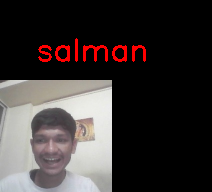

Class - amir 


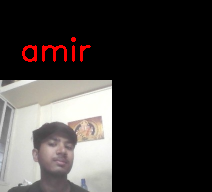

Class -  salman


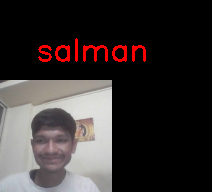

Class -  salman


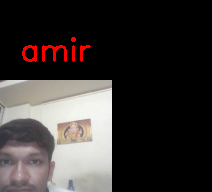

Class -  salman


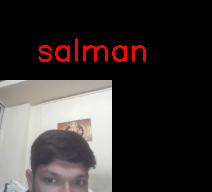

Class -  salman


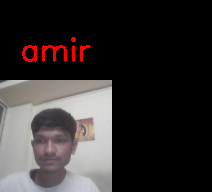

Class - amir 


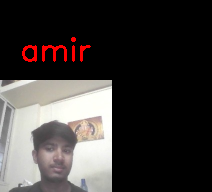

Class -  salman


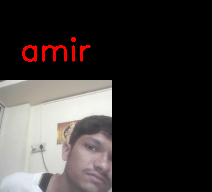

Class - amir 


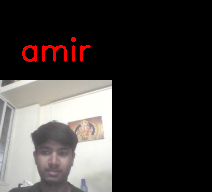

Class -  salman


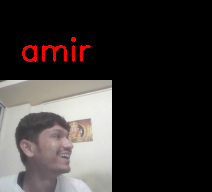

In [ ]:
from keras.models import load_model

classifier = load_model('/content/face recognisation.h5')

import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from os import listdir
from os.path import isfile, join

monkey_breeds_dict = {"[0]": " salman ",
                      "[1]": "amir "}

monkey_breeds_dict_n = {"n0": " salman",
                      "n1": "amir "}

def draw_test(name, pred, im):
    monkey = monkey_breeds_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, monkey, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2_imshow(expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + monkey_breeds_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)

for i in range(0,10):
    input_im = getRandomImage("/content/drive/My Drive/photos/photos/validate/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)

    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3)

    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)

    # Show image with predicted class
    draw_test("Prediction", res, input_original)
    cv2.waitKey(0)

cv2.destroyAllWindows()